In [13]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import statistics
import xgboost

import warnings
warnings.filterwarnings("ignore")

from pycaret.datasets import get_data
from pycaret.classification import *

%matplotlib widget

In [14]:
Base = pd.read_csv("Base.csv")

Base['Time'] = pd.to_datetime(Base['Time'])
Base.set_index('Time',inplace=True)

Base

,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento,Pega,Actividad
Time,,,,,,,,,,,
2015-02-01 00:00:57,57.708860,430.624454,1.301011,1.016953,357.482920,2022.031010,68.507219,0.0,Evento 1,0,RIH
2015-02-01 00:01:00,55.942886,429.602631,1.165243,0.680712,360.418803,2058.592517,60.428979,0.0,Evento 1,0,RIH
2015-02-01 00:01:03,54.164406,428.439948,0.942667,0.394440,365.651801,2097.301313,52.715292,0.0,Evento 1,0,RIH
2015-02-01 00:01:06,52.383372,428.350848,0.769924,0.365904,366.095786,2096.310389,46.199610,0.0,Evento 1,0,RIH
2015-02-01 00:01:09,50.617904,428.265523,0.516112,0.341655,366.543219,2127.829605,39.726500,0.0,Evento 1,0,RIH
...,...,...,...,...,...,...,...,...,...,...,...
2014-04-23 17:01:33,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1,RIH
2014-04-23 17:01:36,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1,RIH
2014-04-23 17:01:39,49.614314,306.256665,6.008588,4.371957,67.291780,1382.719355,87.606353,0.0,Evento 16,1,RIH


In [15]:
from pycaret.anomaly import *

exp_ano101 = setup(Base, normalize = True, 
                   ignore_features = ['Evento',"Pega"],
                   session_id = 123,
                   silent=True)

,Description,Value
0,session_id,123
1,Original Data,"(179468, 11)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(179468, 10)"
9,CPU Jobs,-1


In [16]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [17]:
iforest = create_model('iforest',fraction = 0.01)

In [18]:
iforest_results = assign_model(iforest)
iforest_results.head()

,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento,Pega,Actividad,Anomaly,Anomaly_Score
Time,,,,,,,,,,,,,
2015-02-01 00:00:57,57.708860,430.624454,1.301011,1.016953,357.482920,2022.031010,68.507219,0.0,Evento 1,0,RIH,0,-0.145863
2015-02-01 00:01:00,55.942886,429.602631,1.165243,0.680712,360.418803,2058.592517,60.428979,0.0,Evento 1,0,RIH,0,-0.146255
2015-02-01 00:01:03,54.164406,428.439948,0.942667,0.394440,365.651801,2097.301313,52.715292,0.0,Evento 1,0,RIH,0,-0.148645
2015-02-01 00:01:06,52.383372,428.350848,0.769924,0.365904,366.095786,2096.310389,46.199610,0.0,Evento 1,0,RIH,0,-0.144996
2015-02-01 00:01:09,50.617904,428.265523,0.516112,0.341655,366.543219,2127.829605,39.726500,0.0,Evento 1,0,RIH,0,-0.149716


In [19]:
def plot_incident_stuck(df,size):
    
    '''
    Funcion que toma un dataframe con indice datetime y con columnas de cada variable y realiza las siguientes tareas:
    
    - Grafica el incident
    '''
    
    fig2, ax2 = plt.subplots(nrows=1, ncols=4, figsize=(12,size), sharey=True)
    fig2.suptitle("Incident Log", fontsize=20,va="top")
    fig2.subplots_adjust(top=0.9,wspace=0.2)
 
    #1st track: Block Height, Hook Load & ROP
    ax01=ax2[0].twiny()
    ax01.invert_xaxis()
    ax01.invert_yaxis()
    ax01.set_xlim(0,120)
    ax01.set_ylim([np.max(df.index), np.min(df.index)])
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("Block Height [ft]")
    ax01.plot(df["Block Height"], df.index,"--", label='Block Height [ft]', color='red')
    ax01.set_xlabel('Block Height [ft]',color='red')    
    ax01.tick_params(axis='x', colors='red')
    
    ax11=ax2[0].twiny()
    ax11.invert_xaxis()
    ax11.invert_yaxis()
    ax11.set_xlim(0,900)
    ax11.plot(df["Hook Load"], df.index, label='Hook Load [Klb]', color='blue') 
    ax11.spines['top'].set_position(('outward',40))
    ax11.set_xlabel('Hook Load [Klb]',color='blue')    
    ax11.tick_params(axis='x', colors='blue')

    ax21=ax2[0].twiny() 
    ax21.invert_xaxis()
    ax21.invert_yaxis()
    ax21.invert_yaxis()
    ax21.set_xlim(0,150)
    ax21.plot(df["ROP"], df.index, label='ROP[ft/hr]', color='magenta') 
    ax21.spines['top'].set_position(('outward',80))
    ax21.set_xlabel('ROP[ft/hr]',color='magenta')    
    ax21.tick_params(axis='x', colors='magenta')
    ax21.grid(True)
    
    #2nd track: WOB, Torque, RPM
    ax02=ax2[1].twiny()
    ax02.invert_xaxis()
    ax02.invert_yaxis()
    ax02.set_xlim(0,90)
    ax02.spines['top'].set_position(('outward',0))
    ax02.set_xlabel('WOB[KLb]', color='lime')
    ax02.plot(df.WOB, df.index,"--", label='WOB[KLb]', color='lime')
    ax02.tick_params(axis='x', colors='lime')    
    ax02.grid(True)
    
    ax12=ax2[1].twiny()
    ax12.invert_xaxis()
    ax12.invert_yaxis()
    ax12.set_xlim(0,36)
    ax12.plot(df.Torque, df.index,":", label='Torque[KLb-ft]', color='blue') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('Torque[KLb-ft]', color='blue')    
    ax12.tick_params(axis='x', colors='blue')
    
    ax22=ax2[1].twiny()
    ax22.invert_xaxis()
    ax22.invert_yaxis()
    ax22.set_xlim(0,180)
    ax22.plot(df["RPM"], df.index, '-',label='RPM[Rev/min]', color='dimgrey') 
    ax22.spines['top'].set_position(('outward',80))
    ax22.set_xlabel('RPM[Rev/min]',color='dimgrey')
    ax22.tick_params(axis='x', colors='dimgrey')
    
    #3rd track: Flow In & Pump Pressure
    ax03=ax2[2].twiny()
    ax03.invert_xaxis()
    ax03.invert_yaxis()
    ax03.set_xlim(0,1200)
    ax03.spines['top'].set_position(('outward',0))
    ax03.set_xlabel('Flow In[GPM]')
    ax03.plot(df["Flow In"], df.index,'--', label='DT[us/ft]', color='red')
    ax03.set_xlabel('Flow In[GPM]', color='red')    
    ax03.tick_params(axis='x', colors='red')
    ax03.grid(True)
    
    ax13=ax2[2].twiny()
    ax13.invert_xaxis()
    ax13.invert_yaxis()
    ax13.set_xlim(0,6000)
    ax13.plot(df["Pump Pressure"], df.index, label='Pump Pressure[psi]', color='blue') 
    ax13.spines['top'].set_position(('outward',40))
    ax13.set_xlabel('Pump Pressure[psi]', color='blue')    
    ax13.tick_params(axis='x', colors='blue')
    
    #4rd track: Stuck Pipe & Stuck Pipe Proba
    ax04=ax2[3].twiny()
    ax04.invert_xaxis()
    ax04.invert_yaxis()
    ax04.set_xlim(0,1)
    ax04.spines['top'].set_position(('outward',0))
    ax04.set_xlabel('Stuck Pipe')
    ax04.fill_between(df.Pega, df.index, label="Tuberia Libre o Pegada", color='blue') 
    ax04.set_xlabel('Libre [0] - Pegado [1]', color='blue')    
    ax04.tick_params(axis='x', colors='blue')
    ax04.grid(True)
    
    ax14=ax2[3].twiny()
    ax14.invert_xaxis()
    ax14.invert_yaxis()
    ax14.set_xlim(0,1)
    ax14.plot(df["Anomaly"], df.index,label="Prediccion Prob Pega", color='red')
    ax14.spines['top'].set_position(('outward',40))
    ax14.set_xlabel('Prediccion Prob Pega', color='red')    
    ax14.tick_params(axis='x', colors='red')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
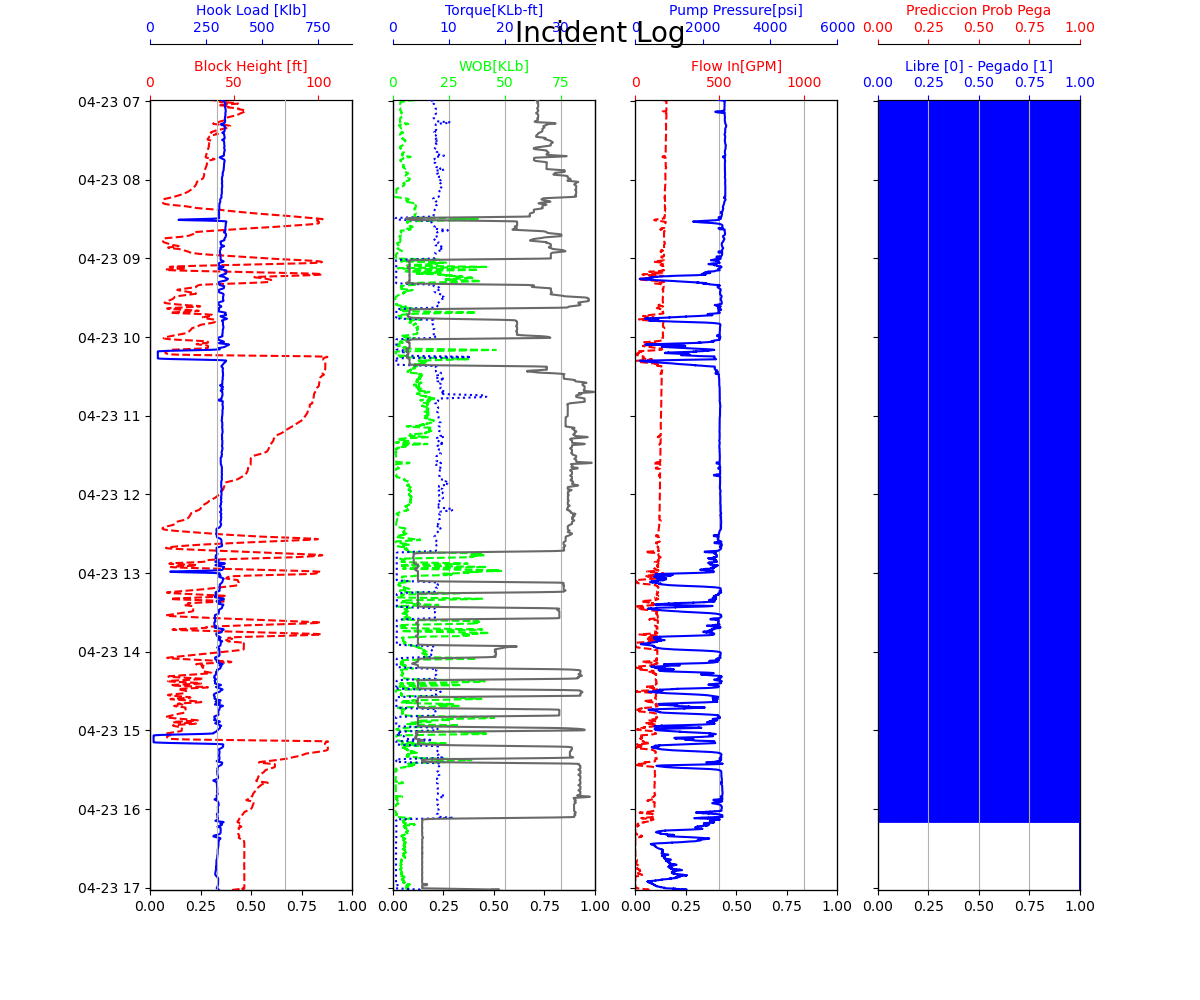

In [37]:
%matplotlib widget
plot_incident_stuck(iforest_results.loc[iforest_results.Evento == "Evento 16"],10)

In [21]:
iforest_results

,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento,Pega,Actividad,Anomaly,Anomaly_Score
Time,,,,,,,,,,,,,
2015-02-01 00:00:57,57.708860,430.624454,1.301011,1.016953,357.482920,2022.031010,68.507219,0.0,Evento 1,0,RIH,0,-0.145863
2015-02-01 00:01:00,55.942886,429.602631,1.165243,0.680712,360.418803,2058.592517,60.428979,0.0,Evento 1,0,RIH,0,-0.146255
2015-02-01 00:01:03,54.164406,428.439948,0.942667,0.394440,365.651801,2097.301313,52.715292,0.0,Evento 1,0,RIH,0,-0.148645
2015-02-01 00:01:06,52.383372,428.350848,0.769924,0.365904,366.095786,2096.310389,46.199610,0.0,Evento 1,0,RIH,0,-0.144996
2015-02-01 00:01:09,50.617904,428.265523,0.516112,0.341655,366.543219,2127.829605,39.726500,0.0,Evento 1,0,RIH,0,-0.149716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-23 17:01:33,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1,RIH,0,-0.135990
2014-04-23 17:01:36,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1,RIH,0,-0.135990
2014-04-23 17:01:39,49.614314,306.256665,6.008588,4.371957,67.291780,1382.719355,87.606353,0.0,Evento 16,1,RIH,0,-0.137494


In [38]:
save_model(iforest, 'iforest_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Evento', 'Pega'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_valu...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                